In [1]:
from itertools import product
import numpy as np
from tqdm import tqdm

In [2]:
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
%matplotlib inline

In [49]:
# game (2 players) settings,
lo, hi = 2, 4

def r1(a1, a2):
    return min(a1, a2) + 2 * np.sign(a2 - a1)

np.random.seed(618)

In [50]:
V1_hist = dict()
k_list = [1, 2, 3]
for k in k_list:
    V1_hist[k] = []

In [54]:
for k in k_list:
    for _ in range(5):
        V1_hist[k].append([])
    
        # strategy settings
        actions = range(lo, hi + 1)
        states = list(map(list, product(actions, repeat=2 * k)))
        
        num_actions = len(actions)
        num_states = len(states)
        R = np.zeros(shape=(num_states, num_actions, num_actions))
        T = np.zeros(shape=(num_states, num_states, num_actions, num_actions))
        print(R.shape, T.shape)
        
        for idx1, a1 in enumerate(actions):
            for idx2, a2 in enumerate(actions):
                R[:, idx1, idx2] = r1(a1, a2)
        
        for idx1, a1 in enumerate(actions):
            for idx2, a2 in enumerate(actions):
                R[:, idx1, idx2] = r1(a1, a2)
        for i, Si in enumerate(states):
            for idx1, a1 in enumerate(actions):
                for idx2, a2 in enumerate(actions):
                    Sj = Si[2:] + [a1, a2]
                    base = [num_actions ** i for i in range(2 * k - 1, -1 , -1)]
                    j = np.dot(np.array(Sj) - lo, base)
                    T[i, j, idx1, idx2] = 1
        
        # initialization
        p1 = np.random.rand(num_states, num_actions)
        p1 = p1 / p1.sum(axis=1, keepdims=True)
        p2 = np.random.rand(num_states, num_actions)
        p2 = p2 / p2.sum(axis=1, keepdims=True)
        
        V1 = np.random.rand(num_states)
        V2 = np.random.rand(num_states)
        
        print(p1.shape, V1.shape)
        
        # refinement mapping iteration
        gamma = 0.95
        it = 20
        for i in tqdm(range(it)):
            R1SA = np.sum(R * p2[:, np.newaxis, :], axis=2)
            T1SAS = np.sum(T * p2[:, np.newaxis, np.newaxis, :], axis=3).transpose(0, 2, 1)
            
            R2SA = np.sum(R * p1[:, np.newaxis, :], axis=2)
            T2SAS = np.sum(T * p1[:, np.newaxis, np.newaxis, :], axis=3).transpose(0, 2, 1)
        
            # solve Bellman expectation equation
            I = np.eye(num_states)
            
            R1S = np.sum(R1SA * p1, axis=1)
            T1SS = np.sum(T1SAS * p1[:, :, np.newaxis], axis=1)
            V1 = np.linalg.inv(I - gamma * T1SS) @ R1S
        
            R2S = np.sum(R2SA * p2, axis=1)
            T2SS = np.sum(T2SAS * p2[:, :, np.newaxis], axis=1)
            V2 = np.linalg.inv(I - gamma * T2SS) @ R2S
        
            # extract Q and refine
            Q1 = R1SA + gamma * T1SAS @ V1
            # V1 = np.sum(Q1 * p1, axis=1))
            ref1 = np.maximum(Q1 - V1[:, np.newaxis], 0)
            p1 = p1 + ref1
            p1 = p1 / p1.sum(axis=1, keepdims=True)

            print(p1.round(3))
            
            Q2 = R2SA + gamma * T2SAS @ V2
            # V2 = np.sum(Q2 * p2, axis=1)
            ref2 = np.maximum(Q2 - V2[:, np.newaxis], 0)
            p2 = p2 + ref2
            p2 = p2 / p2.sum(axis=1, keepdims=True)
        
            V1_hist[k][-1].append(V1.mean())

(9, 3, 3) (9, 9, 3, 3)
(9, 3) (9,)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 1123.53it/s]


[[0.421 0.325 0.254]
 [0.797 0.003 0.2  ]
 [0.258 0.469 0.273]
 [0.783 0.21  0.007]
 [0.441 0.318 0.241]
 [0.451 0.379 0.17 ]
 [0.326 0.638 0.035]
 [0.423 0.38  0.197]
 [0.398 0.546 0.056]]
[[0.688 0.175 0.137]
 [0.857 0.002 0.141]
 [0.617 0.242 0.141]
 [0.835 0.16  0.005]
 [0.695 0.173 0.131]
 [0.695 0.21  0.094]
 [0.631 0.35  0.019]
 [0.677 0.213 0.11 ]
 [0.652 0.315 0.032]]
[[0.796 0.114 0.089]
 [0.89  0.001 0.108]
 [0.76  0.151 0.088]
 [0.871 0.125 0.004]
 [0.8   0.114 0.086]
 [0.799 0.139 0.062]
 [0.765 0.223 0.012]
 [0.788 0.14  0.072]
 [0.773 0.205 0.021]]
[[0.851 0.084 0.065]
 [0.911 0.001 0.088]
 [0.83  0.107 0.063]
 [0.896 0.101 0.003]
 [0.853 0.084 0.063]
 [0.852 0.102 0.046]
 [0.832 0.159 0.009]
 [0.845 0.102 0.053]
 [0.836 0.149 0.015]]
[[0.883 0.066 0.051]
 [0.925 0.001 0.074]
 [0.869 0.082 0.048]
 [0.913 0.085 0.003]
 [0.884 0.066 0.05 ]
 [0.884 0.08  0.036]
 [0.87  0.123 0.007]
 [0.878 0.08  0.041]
 [0.873 0.115 0.012]]
[[0.904 0.054 0.042]
 [0.935 0.001 0.064]
 [0.895 

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 1577.37it/s]


[[0.609 0.27  0.121]
 [0.727 0.085 0.187]
 [0.48  0.236 0.285]
 [0.612 0.055 0.333]
 [0.481 0.245 0.275]
 [0.608 0.14  0.251]
 [0.513 0.249 0.239]
 [0.562 0.211 0.228]
 [0.623 0.15  0.228]]
[[0.738 0.181 0.081]
 [0.808 0.06  0.132]
 [0.602 0.227 0.171]
 [0.766 0.033 0.201]
 [0.622 0.211 0.166]
 [0.745 0.092 0.164]
 [0.688 0.159 0.153]
 [0.687 0.151 0.163]
 [0.757 0.097 0.147]]
[[0.817 0.127 0.057]
 [0.855 0.045 0.1  ]
 [0.748 0.144 0.109]
 [0.844 0.022 0.134]
 [0.761 0.134 0.105]
 [0.825 0.063 0.112]
 [0.795 0.105 0.1  ]
 [0.782 0.105 0.113]
 [0.833 0.066 0.101]]
[[0.862 0.095 0.043]
 [0.885 0.036 0.079]
 [0.822 0.101 0.076]
 [0.882 0.017 0.101]
 [0.83  0.095 0.075]
 [0.868 0.047 0.085]
 [0.851 0.076 0.073]
 [0.839 0.077 0.084]
 [0.874 0.05  0.076]]
[[0.89  0.076 0.034]
 [0.905 0.03  0.065]
 [0.865 0.077 0.058]
 [0.905 0.013 0.081]
 [0.87  0.073 0.057]
 [0.895 0.038 0.067]
 [0.883 0.06  0.057]
 [0.874 0.061 0.065]
 [0.899 0.04  0.061]]
[[0.909 0.063 0.028]
 [0.919 0.025 0.055]
 [0.892 

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 1386.62it/s]


[[0.631 0.099 0.27 ]
 [0.65  0.252 0.098]
 [0.556 0.202 0.242]
 [0.674 0.024 0.302]
 [0.74  0.176 0.084]
 [0.567 0.296 0.137]
 [0.58  0.381 0.04 ]
 [0.662 0.137 0.201]
 [0.694 0.171 0.135]]
[[0.776 0.06  0.163]
 [0.794 0.148 0.058]
 [0.744 0.116 0.14 ]
 [0.807 0.014 0.179]
 [0.83  0.115 0.055]
 [0.75  0.171 0.079]
 [0.742 0.233 0.024]
 [0.787 0.087 0.127]
 [0.795 0.115 0.09 ]]
[[0.843 0.042 0.114]
 [0.854 0.105 0.041]
 [0.825 0.079 0.095]
 [0.864 0.01  0.126]
 [0.873 0.086 0.041]
 [0.828 0.118 0.054]
 [0.82  0.163 0.017]
 [0.846 0.062 0.091]
 [0.849 0.085 0.067]]
[[0.88  0.032 0.088]
 [0.886 0.082 0.032]
 [0.868 0.06  0.072]
 [0.894 0.008 0.098]
 [0.899 0.069 0.033]
 [0.87  0.089 0.041]
 [0.863 0.124 0.013]
 [0.881 0.048 0.071]
 [0.881 0.066 0.052]]
[[0.903 0.026 0.071]
 [0.907 0.067 0.026]
 [0.895 0.048 0.057]
 [0.914 0.006 0.08 ]
 [0.915 0.057 0.027]
 [0.896 0.071 0.033]
 [0.89  0.1   0.01 ]
 [0.903 0.039 0.058]
 [0.902 0.055 0.043]]
[[0.919 0.022 0.06 ]
 [0.922 0.056 0.022]
 [0.912 

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 1945.50it/s]


[[0.413 0.402 0.185]
 [0.384 0.424 0.192]
 [0.482 0.341 0.178]
 [0.525 0.351 0.125]
 [0.283 0.464 0.253]
 [0.453 0.394 0.153]
 [0.566 0.293 0.141]
 [0.577 0.295 0.128]
 [0.033 0.635 0.332]]
[[0.692 0.211 0.097]
 [0.688 0.215 0.097]
 [0.727 0.18  0.094]
 [0.743 0.19  0.067]
 [0.648 0.228 0.124]
 [0.715 0.205 0.08 ]
 [0.768 0.157 0.075]
 [0.769 0.161 0.07 ]
 [0.541 0.332 0.127]]
[[0.799 0.138 0.064]
 [0.795 0.141 0.064]
 [0.815 0.122 0.063]
 [0.825 0.129 0.046]
 [0.774 0.146 0.08 ]
 [0.809 0.137 0.053]
 [0.84  0.108 0.052]
 [0.841 0.111 0.048]
 [0.732 0.194 0.074]]
[[0.852 0.101 0.047]
 [0.849 0.104 0.047]
 [0.861 0.091 0.048]
 [0.868 0.098 0.035]
 [0.837 0.106 0.058]
 [0.858 0.103 0.04 ]
 [0.878 0.082 0.04 ]
 [0.879 0.085 0.037]
 [0.817 0.132 0.051]]
[[0.884 0.079 0.037]
 [0.881 0.082 0.037]
 [0.889 0.073 0.038]
 [0.894 0.078 0.028]
 [0.873 0.082 0.045]
 [0.887 0.081 0.032]
 [0.901 0.067 0.032]
 [0.902 0.068 0.03 ]
 [0.863 0.099 0.038]]
[[0.905 0.065 0.03 ]
 [0.903 0.067 0.03 ]
 [0.908 

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 1845.15it/s]


[[0.677 0.179 0.144]
 [0.711 0.14  0.149]
 [0.571 0.255 0.173]
 [0.605 0.165 0.23 ]
 [0.655 0.264 0.081]
 [0.683 0.205 0.112]
 [0.508 0.26  0.232]
 [0.571 0.222 0.208]
 [0.707 0.03  0.263]]
[[0.775 0.125 0.1  ]
 [0.801 0.096 0.103]
 [0.72  0.167 0.113]
 [0.773 0.095 0.133]
 [0.777 0.171 0.052]
 [0.786 0.139 0.076]
 [0.731 0.142 0.127]
 [0.729 0.14  0.131]
 [0.797 0.021 0.182]]
[[0.833 0.093 0.075]
 [0.85  0.072 0.077]
 [0.803 0.117 0.08 ]
 [0.841 0.066 0.092]
 [0.837 0.125 0.038]
 [0.841 0.103 0.056]
 [0.819 0.096 0.085]
 [0.81  0.098 0.092]
 [0.85  0.016 0.135]]
[[0.87  0.072 0.058]
 [0.882 0.057 0.061]
 [0.852 0.088 0.06 ]
 [0.879 0.05  0.071]
 [0.874 0.097 0.03 ]
 [0.875 0.081 0.044]
 [0.865 0.071 0.064]
 [0.858 0.074 0.069]
 [0.882 0.012 0.106]]
[[0.894 0.059 0.047]
 [0.903 0.047 0.05 ]
 [0.883 0.07  0.047]
 [0.902 0.041 0.057]
 [0.897 0.079 0.024]
 [0.898 0.066 0.036]
 [0.893 0.057 0.05 ]
 [0.887 0.058 0.055]
 [0.904 0.01  0.086]]
[[0.911 0.049 0.039]
 [0.918 0.04  0.042]
 [0.904 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 340.76it/s]


[[0.42  0.369 0.211]
 [0.715 0.053 0.232]
 [0.385 0.382 0.233]
 [0.74  0.195 0.065]
 [0.774 0.061 0.165]
 [0.375 0.462 0.163]
 [0.342 0.618 0.04 ]
 [0.775 0.134 0.091]
 [0.441 0.343 0.215]
 [0.498 0.255 0.247]
 [0.704 0.055 0.241]
 [0.712 0.057 0.231]
 [0.44  0.431 0.129]
 [0.696 0.186 0.118]
 [0.727 0.197 0.076]
 [0.539 0.39  0.072]
 [0.711 0.177 0.112]
 [0.572 0.156 0.273]
 [0.607 0.203 0.19 ]
 [0.539 0.271 0.19 ]
 [0.611 0.206 0.183]
 [0.457 0.355 0.188]
 [0.784 0.031 0.184]
 [0.284 0.461 0.255]
 [0.317 0.553 0.13 ]
 [0.628 0.106 0.266]
 [0.442 0.334 0.224]
 [0.697 0.161 0.143]
 [0.597 0.3   0.104]
 [0.318 0.601 0.081]
 [0.614 0.321 0.065]
 [0.678 0.204 0.118]
 [0.276 0.412 0.311]
 [0.2   0.515 0.284]
 [0.647 0.138 0.215]
 [0.425 0.245 0.33 ]
 [0.14  0.598 0.262]
 [0.43  0.44  0.13 ]
 [0.369 0.445 0.185]
 [0.593 0.287 0.12 ]
 [0.656 0.143 0.201]
 [0.28  0.527 0.193]
 [0.4   0.381 0.219]
 [0.696 0.261 0.043]
 [0.399 0.399 0.202]
 [0.654 0.199 0.147]
 [0.563 0.409 0.028]
 [0.481 0.321

  0%|                                                                                                                    | 0/20 [00:00<?, ?it/s]

[[0.365 0.395 0.24 ]
 [0.746 0.1   0.154]
 [0.461 0.368 0.171]
 [0.192 0.598 0.21 ]
 [0.303 0.581 0.116]
 [0.398 0.554 0.048]
 [0.412 0.406 0.182]
 [0.686 0.101 0.213]
 [0.462 0.456 0.083]
 [0.451 0.408 0.141]
 [0.735 0.09  0.175]
 [0.552 0.447 0.   ]
 [0.475 0.314 0.211]
 [0.4   0.457 0.142]
 [0.483 0.381 0.136]
 [0.786 0.082 0.132]
 [0.682 0.235 0.083]
 [0.298 0.569 0.132]
 [0.294 0.652 0.054]
 [0.706 0.164 0.13 ]
 [0.403 0.433 0.164]
 [0.202 0.681 0.118]
 [0.287 0.565 0.148]
 [0.77  0.176 0.054]
 [0.566 0.294 0.141]
 [0.255 0.607 0.138]
 [0.3   0.566 0.133]
 [0.284 0.532 0.185]
 [0.545 0.317 0.138]
 [0.483 0.371 0.145]
 [0.381 0.472 0.147]
 [0.192 0.716 0.092]
 [0.695 0.174 0.131]
 [0.723 0.051 0.226]
 [0.555 0.379 0.067]
 [0.306 0.517 0.177]
 [0.415 0.382 0.203]
 [0.757 0.146 0.097]
 [0.686 0.246 0.069]
 [0.193 0.66  0.148]
 [0.277 0.595 0.128]
 [0.541 0.33  0.129]
 [0.602 0.206 0.192]
 [0.61  0.239 0.151]
 [0.558 0.402 0.04 ]
 [0.435 0.373 0.192]
 [0.449 0.357 0.194]
 [0.453 0.425

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 262.32it/s]


[[0.973 0.017 0.01 ]
 [0.975 0.01  0.015]
 [0.97  0.02  0.009]
 [0.971 0.021 0.007]
 [0.972 0.024 0.005]
 [0.971 0.027 0.002]
 [0.971 0.02  0.009]
 [0.974 0.008 0.017]
 [0.972 0.024 0.004]
 [0.972 0.02  0.007]
 [0.975 0.008 0.016]
 [0.972 0.028 0.   ]
 [0.972 0.017 0.011]
 [0.972 0.021 0.007]
 [0.972 0.021 0.007]
 [0.976 0.009 0.015]
 [0.972 0.02  0.007]
 [0.971 0.023 0.005]
 [0.972 0.026 0.002]
 [0.973 0.015 0.012]
 [0.971 0.021 0.008]
 [0.971 0.025 0.004]
 [0.972 0.022 0.006]
 [0.974 0.02  0.006]
 [0.973 0.018 0.009]
 [0.971 0.023 0.005]
 [0.972 0.023 0.005]
 [0.972 0.021 0.007]
 [0.973 0.019 0.008]
 [0.971 0.021 0.008]
 [0.973 0.02  0.006]
 [0.972 0.025 0.003]
 [0.974 0.015 0.011]
 [0.974 0.005 0.022]
 [0.972 0.023 0.004]
 [0.971 0.021 0.007]
 [0.973 0.018 0.009]
 [0.974 0.015 0.01 ]
 [0.972 0.022 0.006]
 [0.971 0.024 0.005]
 [0.971 0.024 0.005]
 [0.971 0.021 0.008]
 [0.973 0.014 0.013]
 [0.974 0.016 0.01 ]
 [0.971 0.026 0.003]
 [0.972 0.018 0.009]
 [0.972 0.019 0.009]
 [0.971 0.023

  0%|                                                                                                                    | 0/20 [00:00<?, ?it/s]

[[0.634 0.337 0.029]
 [0.495 0.409 0.096]
 [0.142 0.629 0.229]
 [0.734 0.002 0.264]
 [0.421 0.567 0.013]
 [0.727 0.115 0.158]
 [0.378 0.417 0.205]
 [0.48  0.434 0.086]
 [0.608 0.135 0.257]
 [0.529 0.344 0.127]
 [0.632 0.29  0.078]
 [0.576 0.328 0.096]
 [0.568 0.356 0.075]
 [0.394 0.461 0.145]
 [0.516 0.39  0.094]
 [0.464 0.38  0.157]
 [0.639 0.268 0.093]
 [0.673 0.231 0.096]
 [0.607 0.216 0.177]
 [0.65  0.316 0.034]
 [0.405 0.358 0.237]
 [0.639 0.217 0.145]
 [0.366 0.592 0.041]
 [0.697 0.201 0.102]
 [0.606 0.134 0.259]
 [0.574 0.322 0.104]
 [0.63  0.204 0.166]
 [0.663 0.09  0.247]
 [0.438 0.452 0.109]
 [0.814 0.009 0.177]
 [0.769 0.149 0.082]
 [0.385 0.582 0.032]
 [0.792 0.121 0.087]
 [0.651 0.133 0.216]
 [0.688 0.26  0.052]
 [0.85  0.102 0.048]
 [0.721 0.137 0.142]
 [0.608 0.263 0.13 ]
 [0.721 0.148 0.13 ]
 [0.534 0.302 0.164]
 [0.173 0.706 0.121]
 [0.453 0.409 0.138]
 [0.712 0.119 0.169]
 [0.753 0.162 0.085]
 [0.502 0.315 0.182]
 [0.694 0.052 0.254]
 [0.492 0.364 0.144]
 [0.805 0.019

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 247.62it/s]


[[0.96  0.037 0.003]
 [0.96  0.032 0.008]
 [0.958 0.032 0.01 ]
 [0.964 0.    0.035]
 [0.958 0.041 0.001]
 [0.964 0.015 0.021]
 [0.96  0.027 0.013]
 [0.957 0.036 0.007]
 [0.96  0.014 0.026]
 [0.961 0.029 0.011]
 [0.961 0.031 0.008]
 [0.961 0.03  0.009]
 [0.962 0.032 0.007]
 [0.961 0.03  0.009]
 [0.96  0.032 0.008]
 [0.959 0.029 0.012]
 [0.962 0.028 0.01 ]
 [0.962 0.027 0.011]
 [0.961 0.022 0.018]
 [0.961 0.035 0.004]
 [0.958 0.025 0.017]
 [0.961 0.023 0.016]
 [0.96  0.038 0.003]
 [0.962 0.025 0.013]
 [0.964 0.012 0.024]
 [0.961 0.029 0.009]
 [0.962 0.021 0.017]
 [0.962 0.01  0.028]
 [0.959 0.033 0.008]
 [0.966 0.002 0.033]
 [0.966 0.022 0.012]
 [0.959 0.039 0.002]
 [0.965 0.02  0.014]
 [0.965 0.013 0.022]
 [0.964 0.03  0.006]
 [0.966 0.023 0.011]
 [0.964 0.018 0.019]
 [0.962 0.025 0.013]
 [0.965 0.018 0.016]
 [0.961 0.025 0.014]
 [0.958 0.036 0.006]
 [0.958 0.032 0.011]
 [0.964 0.015 0.021]
 [0.964 0.024 0.012]
 [0.961 0.025 0.014]
 [0.961 0.007 0.032]
 [0.96  0.029 0.011]
 [0.967 0.003

  0%|                                                                                                                    | 0/20 [00:00<?, ?it/s]

[[0.141 0.695 0.164]
 [0.567 0.142 0.292]
 [0.346 0.435 0.219]
 [0.52  0.325 0.155]
 [0.776 0.113 0.111]
 [0.759 0.064 0.177]
 [0.488 0.328 0.184]
 [0.673 0.253 0.074]
 [0.392 0.468 0.14 ]
 [0.515 0.271 0.214]
 [0.612 0.24  0.147]
 [0.482 0.353 0.165]
 [0.449 0.329 0.221]
 [0.554 0.317 0.129]
 [0.736 0.147 0.117]
 [0.493 0.225 0.281]
 [0.535 0.342 0.124]
 [0.542 0.273 0.184]
 [0.429 0.406 0.165]
 [0.712 0.13  0.157]
 [0.404 0.463 0.134]
 [0.5   0.339 0.161]
 [0.719 0.083 0.198]
 [0.657 0.184 0.16 ]
 [0.329 0.663 0.008]
 [0.305 0.652 0.042]
 [0.423 0.439 0.138]
 [0.555 0.131 0.314]
 [0.687 0.166 0.147]
 [0.388 0.423 0.189]
 [0.458 0.378 0.164]
 [0.791 0.107 0.102]
 [0.608 0.299 0.093]
 [0.423 0.274 0.303]
 [0.643 0.202 0.155]
 [0.458 0.369 0.173]
 [0.288 0.617 0.095]
 [0.754 0.083 0.163]
 [0.339 0.463 0.197]
 [0.707 0.08  0.213]
 [0.732 0.086 0.181]
 [0.565 0.3   0.135]
 [0.33  0.507 0.164]
 [0.609 0.231 0.16 ]
 [0.351 0.425 0.223]
 [0.283 0.367 0.35 ]
 [0.748 0.103 0.148]
 [0.255 0.61 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 287.93it/s]


[[0.946 0.043 0.01 ]
 [0.944 0.038 0.018]
 [0.948 0.036 0.016]
 [0.948 0.035 0.017]
 [0.952 0.024 0.024]
 [0.958 0.011 0.031]
 [0.952 0.031 0.017]
 [0.948 0.04  0.012]
 [0.946 0.042 0.012]
 [0.947 0.03  0.023]
 [0.951 0.03  0.019]
 [0.949 0.035 0.016]
 [0.947 0.032 0.021]
 [0.952 0.034 0.014]
 [0.956 0.025 0.02 ]
 [0.95  0.022 0.028]
 [0.949 0.038 0.014]
 [0.951 0.029 0.02 ]
 [0.949 0.036 0.015]
 [0.954 0.021 0.025]
 [0.945 0.043 0.012]
 [0.945 0.037 0.018]
 [0.945 0.038 0.017]
 [0.953 0.025 0.022]
 [0.949 0.05  0.001]
 [0.941 0.055 0.004]
 [0.949 0.039 0.012]
 [0.949 0.015 0.036]
 [0.953 0.025 0.022]
 [0.947 0.037 0.017]
 [0.947 0.037 0.016]
 [0.958 0.021 0.02 ]
 [0.95  0.038 0.012]
 [0.949 0.033 0.018]
 [0.952 0.027 0.021]
 [0.947 0.038 0.015]
 [0.946 0.047 0.007]
 [0.955 0.015 0.03 ]
 [0.946 0.039 0.014]
 [0.948 0.014 0.037]
 [0.951 0.021 0.028]
 [0.949 0.038 0.013]
 [0.947 0.04  0.013]
 [0.95  0.029 0.02 ]
 [0.945 0.041 0.014]
 [0.944 0.032 0.024]
 [0.955 0.019 0.027]
 [0.947 0.044

  0%|                                                                                                                    | 0/20 [00:00<?, ?it/s]

[[0.672 0.201 0.126]
 [0.738 0.22  0.042]
 [0.348 0.456 0.196]
 [0.829 0.153 0.018]
 [0.622 0.222 0.156]
 [0.485 0.326 0.189]
 [0.571 0.286 0.142]
 [0.696 0.162 0.142]
 [0.584 0.241 0.174]
 [0.714 0.117 0.169]
 [0.582 0.152 0.267]
 [0.421 0.428 0.151]
 [0.66  0.195 0.145]
 [0.727 0.207 0.066]
 [0.721 0.119 0.16 ]
 [0.814 0.033 0.153]
 [0.805 0.051 0.144]
 [0.589 0.132 0.28 ]
 [0.8   0.015 0.185]
 [0.79  0.055 0.155]
 [0.42  0.404 0.176]
 [0.733 0.056 0.211]
 [0.589 0.281 0.131]
 [0.469 0.343 0.189]
 [0.654 0.271 0.075]
 [0.653 0.211 0.136]
 [0.682 0.289 0.029]
 [0.55  0.324 0.126]
 [0.709 0.193 0.098]
 [0.586 0.287 0.127]
 [0.612 0.176 0.213]
 [0.601 0.275 0.124]
 [0.654 0.232 0.114]
 [0.483 0.423 0.094]
 [0.465 0.308 0.227]
 [0.504 0.058 0.438]
 [0.676 0.215 0.109]
 [0.71  0.216 0.074]
 [0.763 0.109 0.129]
 [0.764 0.009 0.227]
 [0.824 0.116 0.061]
 [0.721 0.088 0.191]
 [0.586 0.26  0.154]
 [0.737 0.051 0.212]
 [0.543 0.36  0.097]
 [0.517 0.202 0.282]
 [0.613 0.323 0.064]
 [0.361 0.41 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 239.33it/s]

[[0.969 0.019 0.012]
 [0.97  0.025 0.005]
 [0.967 0.023 0.01 ]
 [0.971 0.026 0.003]
 [0.97  0.018 0.013]
 [0.967 0.021 0.012]
 [0.968 0.021 0.01 ]
 [0.969 0.016 0.014]
 [0.969 0.018 0.013]
 [0.971 0.012 0.017]
 [0.969 0.011 0.02 ]
 [0.968 0.024 0.008]
 [0.969 0.018 0.013]
 [0.97  0.023 0.007]
 [0.97  0.013 0.017]
 [0.972 0.005 0.023]
 [0.972 0.007 0.021]
 [0.97  0.01  0.02 ]
 [0.972 0.002 0.026]
 [0.972 0.007 0.021]
 [0.968 0.022 0.01 ]
 [0.97  0.006 0.023]
 [0.968 0.022 0.01 ]
 [0.966 0.022 0.012]
 [0.969 0.024 0.007]
 [0.969 0.019 0.012]
 [0.969 0.028 0.003]
 [0.968 0.023 0.009]
 [0.972 0.019 0.01 ]
 [0.968 0.022 0.01 ]
 [0.971 0.013 0.016]
 [0.968 0.022 0.01 ]
 [0.969 0.021 0.01 ]
 [0.968 0.026 0.006]
 [0.967 0.019 0.014]
 [0.971 0.003 0.026]
 [0.97  0.02  0.01 ]
 [0.97  0.022 0.008]
 [0.972 0.013 0.015]
 [0.972 0.001 0.027]
 [0.971 0.019 0.01 ]
 [0.97  0.009 0.02 ]
 [0.97  0.019 0.011]
 [0.97  0.006 0.024]
 [0.969 0.025 0.007]
 [0.967 0.019 0.014]
 [0.969 0.026 0.005]
 [0.968 0.021

(729, 3) (729,)


  5%|█████▍                                                                                                      | 1/20 [00:00<00:02,  6.91it/s]

[[0.661 0.027 0.312]
 [0.524 0.283 0.193]
 [0.231 0.516 0.253]
 ...
 [0.596 0.197 0.206]
 [0.609 0.244 0.147]
 [0.614 0.258 0.128]]


 10%|██████████▊                                                                                                 | 2/20 [00:00<00:02,  6.94it/s]

[[0.8   0.016 0.184]
 [0.727 0.162 0.111]
 [0.652 0.241 0.107]
 ...
 [0.771 0.112 0.117]
 [0.749 0.157 0.094]
 [0.777 0.149 0.074]]


 15%|████████████████▏                                                                                           | 3/20 [00:00<00:02,  7.09it/s]

[[0.861 0.011 0.128]
 [0.819 0.108 0.074]
 [0.781 0.152 0.067]
 ...
 [0.843 0.077 0.08 ]
 [0.822 0.111 0.067]
 [0.849 0.101 0.05 ]]


 20%|█████████████████████▌                                                                                      | 4/20 [00:00<00:02,  7.28it/s]

[[0.893 0.009 0.099]
 [0.865 0.08  0.055]
 [0.844 0.108 0.048]
 ...
 [0.881 0.058 0.061]
 [0.865 0.085 0.051]
 [0.885 0.077 0.038]]


 25%|███████████████████████████                                                                                 | 5/20 [00:00<00:02,  7.07it/s]

[[0.912 0.007 0.081]
 [0.892 0.064 0.044]
 [0.88  0.083 0.037]
 ...
 [0.903 0.047 0.049]
 [0.892 0.068 0.041]
 [0.907 0.063 0.031]]


 30%|████████████████████████████████▍                                                                           | 6/20 [00:00<00:01,  7.08it/s]

[[0.926 0.006 0.068]
 [0.911 0.053 0.036]
 [0.903 0.068 0.03 ]
 ...
 [0.919 0.04  0.041]
 [0.91  0.056 0.034]
 [0.921 0.053 0.026]]


 35%|█████████████████████████████████████▊                                                                      | 7/20 [00:00<00:01,  7.06it/s]

[[0.936 0.005 0.059]
 [0.924 0.045 0.031]
 [0.918 0.057 0.025]
 ...
 [0.93  0.034 0.036]
 [0.923 0.048 0.029]
 [0.932 0.045 0.022]]


 40%|███████████████████████████████████████████▏                                                                | 8/20 [00:01<00:01,  7.27it/s]

[[0.943 0.005 0.052]
 [0.934 0.039 0.027]
 [0.929 0.049 0.022]
 ...
 [0.939 0.03  0.031]
 [0.933 0.042 0.025]
 [0.94  0.04  0.02 ]]


 45%|████████████████████████████████████████████████▌                                                           | 9/20 [00:01<00:01,  7.25it/s]

[[0.949 0.004 0.047]
 [0.941 0.035 0.024]
 [0.938 0.043 0.019]
 ...
 [0.945 0.027 0.028]
 [0.941 0.037 0.022]
 [0.947 0.036 0.018]]


 50%|█████████████████████████████████████████████████████▌                                                     | 10/20 [00:01<00:01,  7.48it/s]

[[0.954 0.004 0.043]
 [0.947 0.031 0.021]
 [0.945 0.038 0.017]
 ...
 [0.951 0.024 0.025]
 [0.947 0.033 0.02 ]
 [0.952 0.032 0.016]]


 55%|██████████████████████████████████████████████████████████▊                                                | 11/20 [00:01<00:01,  7.24it/s]

[[0.958 0.003 0.039]
 [0.952 0.028 0.019]
 [0.95  0.035 0.015]
 ...
 [0.955 0.022 0.023]
 [0.952 0.03  0.018]
 [0.956 0.029 0.015]]


 60%|████████████████████████████████████████████████████████████████▏                                          | 12/20 [00:01<00:01,  7.41it/s]

[[0.961 0.003 0.036]
 [0.956 0.026 0.018]
 [0.955 0.031 0.014]
 ...
 [0.959 0.02  0.021]
 [0.956 0.028 0.017]
 [0.959 0.027 0.013]]


 65%|█████████████████████████████████████████████████████████████████████▌                                     | 13/20 [00:01<00:01,  6.87it/s]

[[0.964 0.003 0.033]
 [0.96  0.024 0.016]
 [0.958 0.029 0.013]
 ...
 [0.962 0.019 0.02 ]
 [0.959 0.025 0.015]
 [0.962 0.025 0.012]]


 70%|██████████████████████████████████████████████████████████████████████████▉                                | 14/20 [00:01<00:00,  7.08it/s]

[[0.966 0.003 0.031]
 [0.963 0.022 0.015]
 [0.961 0.027 0.012]
 ...
 [0.964 0.017 0.018]
 [0.962 0.023 0.014]
 [0.965 0.023 0.012]]


 75%|████████████████████████████████████████████████████████████████████████████████▎                          | 15/20 [00:02<00:00,  7.21it/s]

[[0.968 0.003 0.029]
 [0.965 0.021 0.014]
 [0.964 0.025 0.011]
 ...
 [0.967 0.016 0.017]
 [0.965 0.022 0.013]
 [0.967 0.022 0.011]]


 80%|█████████████████████████████████████████████████████████████████████████████████████▌                     | 16/20 [00:02<00:00,  7.29it/s]

[[0.97  0.002 0.027]
 [0.967 0.019 0.013]
 [0.967 0.023 0.01 ]
 ...
 [0.969 0.015 0.016]
 [0.967 0.02  0.012]
 [0.969 0.021 0.01 ]]


 85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 17/20 [00:02<00:00,  7.40it/s]

[[0.972 0.002 0.026]
 [0.969 0.018 0.012]
 [0.969 0.022 0.01 ]
 ...
 [0.971 0.014 0.015]
 [0.969 0.019 0.012]
 [0.971 0.019 0.01 ]]


 90%|████████████████████████████████████████████████████████████████████████████████████████████████▎          | 18/20 [00:02<00:00,  7.49it/s]

[[0.974 0.002 0.024]
 [0.971 0.017 0.012]
 [0.97  0.02  0.009]
 ...
 [0.972 0.014 0.014]
 [0.971 0.018 0.011]
 [0.973 0.018 0.009]]


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 19/20 [00:02<00:00,  7.58it/s]

[[0.975 0.002 0.023]
 [0.973 0.016 0.011]
 [0.972 0.019 0.009]
 ...
 [0.974 0.013 0.013]
 [0.973 0.017 0.01 ]
 [0.974 0.017 0.009]]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  7.20it/s]

[[0.976 0.002 0.022]
 [0.974 0.015 0.011]
 [0.974 0.018 0.008]
 ...
 [0.975 0.012 0.013]
 [0.974 0.016 0.01 ]
 [0.975 0.016 0.008]]
(729, 3, 3) (729, 729, 3, 3)


(729, 3) (729,)


  5%|█████▍                                                                                                      | 1/20 [00:00<00:02,  7.89it/s]

[[0.491 0.316 0.193]
 [0.689 0.028 0.283]
 [0.442 0.511 0.047]
 ...
 [0.306 0.585 0.108]
 [0.525 0.322 0.154]
 [0.575 0.161 0.264]]


 10%|██████████▊                                                                                                 | 2/20 [00:00<00:02,  7.77it/s]

[[0.677 0.201 0.122]
 [0.808 0.017 0.175]
 [0.69  0.284 0.026]
 ...
 [0.642 0.302 0.056]
 [0.743 0.174 0.083]
 [0.801 0.075 0.124]]


 15%|████████████████▏                                                                                           | 3/20 [00:00<00:02,  7.30it/s]

[[0.774 0.14  0.086]
 [0.861 0.013 0.127]
 [0.79  0.192 0.018]
 ...
 [0.768 0.196 0.036]
 [0.809 0.129 0.062]
 [0.862 0.052 0.086]]


 20%|█████████████████████▌                                                                                      | 4/20 [00:00<00:02,  7.34it/s]

[[0.831 0.105 0.064]
 [0.891 0.01  0.099]
 [0.845 0.142 0.013]
 ...
 [0.831 0.143 0.026]
 [0.854 0.099 0.047]
 [0.894 0.04  0.066]]


 25%|███████████████████████████                                                                                 | 5/20 [00:00<00:02,  6.79it/s]

[[0.867 0.082 0.05 ]
 [0.911 0.008 0.081]
 [0.878 0.112 0.01 ]
 ...
 [0.868 0.111 0.021]
 [0.883 0.079 0.038]
 [0.913 0.033 0.054]]


 30%|████████████████████████████████▍                                                                           | 6/20 [00:00<00:01,  7.15it/s]

[[0.892 0.067 0.041]
 [0.924 0.007 0.069]
 [0.9   0.092 0.008]
 ...
 [0.893 0.09  0.017]
 [0.903 0.066 0.031]
 [0.926 0.028 0.046]]


 35%|█████████████████████████████████████▊                                                                      | 7/20 [00:00<00:01,  7.10it/s]

[[0.909 0.057 0.034]
 [0.934 0.006 0.06 ]
 [0.915 0.077 0.007]
 ...
 [0.91  0.076 0.014]
 [0.917 0.056 0.027]
 [0.935 0.025 0.04 ]]


 40%|███████████████████████████████████████████▏                                                                | 8/20 [00:01<00:01,  7.31it/s]

[[0.922 0.049 0.03 ]
 [0.942 0.005 0.053]
 [0.927 0.067 0.006]
 ...
 [0.923 0.065 0.012]
 [0.928 0.049 0.023]
 [0.943 0.022 0.036]]


 45%|████████████████████████████████████████████████▌                                                           | 9/20 [00:01<00:01,  7.32it/s]

[[0.932 0.043 0.026]
 [0.948 0.005 0.047]
 [0.936 0.059 0.005]
 ...
 [0.932 0.057 0.011]
 [0.937 0.043 0.02 ]
 [0.949 0.019 0.032]]


 50%|█████████████████████████████████████████████████████▌                                                     | 10/20 [00:01<00:01,  7.38it/s]

[[0.939 0.038 0.023]
 [0.953 0.004 0.043]
 [0.943 0.052 0.005]
 ...
 [0.94  0.051 0.009]
 [0.943 0.038 0.018]
 [0.953 0.018 0.029]]


 55%|██████████████████████████████████████████████████████████▊                                                | 11/20 [00:01<00:01,  7.43it/s]

[[0.945 0.034 0.021]
 [0.957 0.004 0.039]
 [0.948 0.047 0.004]
 ...
 [0.946 0.046 0.008]
 [0.949 0.035 0.016]
 [0.957 0.016 0.027]]


 60%|████████████████████████████████████████████████████████████████▏                                          | 12/20 [00:01<00:01,  7.56it/s]

[[0.95  0.031 0.019]
 [0.96  0.004 0.036]
 [0.953 0.043 0.004]
 ...
 [0.951 0.041 0.008]
 [0.953 0.031 0.015]
 [0.961 0.015 0.024]]


 65%|█████████████████████████████████████████████████████████████████████▌                                     | 13/20 [00:01<00:00,  7.61it/s]

[[0.955 0.028 0.017]
 [0.963 0.003 0.033]
 [0.957 0.039 0.004]
 ...
 [0.955 0.038 0.007]
 [0.957 0.029 0.014]
 [0.964 0.014 0.023]]


 70%|██████████████████████████████████████████████████████████████████████████▉                                | 14/20 [00:01<00:00,  7.65it/s]

[[0.958 0.026 0.016]
 [0.966 0.003 0.031]
 [0.96  0.036 0.003]
 ...
 [0.959 0.035 0.006]
 [0.961 0.027 0.013]
 [0.966 0.013 0.021]]


 75%|████████████████████████████████████████████████████████████████████████████████▎                          | 15/20 [00:02<00:00,  7.61it/s]

[[0.961 0.024 0.015]
 [0.968 0.003 0.029]
 [0.963 0.034 0.003]
 ...
 [0.962 0.032 0.006]
 [0.963 0.025 0.012]
 [0.968 0.012 0.02 ]]


 80%|█████████████████████████████████████████████████████████████████████████████████████▌                     | 16/20 [00:02<00:00,  7.67it/s]

[[0.964 0.022 0.014]
 [0.97  0.003 0.027]
 [0.966 0.032 0.003]
 ...
 [0.964 0.03  0.006]
 [0.966 0.023 0.011]
 [0.97  0.011 0.019]]


 85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 17/20 [00:02<00:00,  7.69it/s]

[[0.966 0.021 0.013]
 [0.972 0.003 0.026]
 [0.968 0.03  0.003]
 ...
 [0.967 0.028 0.005]
 [0.968 0.022 0.01 ]
 [0.972 0.011 0.018]]


 90%|████████████████████████████████████████████████████████████████████████████████████████████████▎          | 18/20 [00:02<00:00,  7.75it/s]

[[0.968 0.02  0.012]
 [0.973 0.002 0.024]
 [0.97  0.028 0.003]
 ...
 [0.969 0.026 0.005]
 [0.97  0.02  0.01 ]
 [0.973 0.01  0.017]]


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 19/20 [00:02<00:00,  7.75it/s]

[[0.97  0.019 0.011]
 [0.974 0.002 0.023]
 [0.971 0.026 0.002]
 ...
 [0.97  0.025 0.005]
 [0.971 0.019 0.009]
 [0.975 0.01  0.016]]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  7.48it/s]


[[0.972 0.018 0.011]
 [0.976 0.002 0.022]
 [0.973 0.025 0.002]
 ...
 [0.972 0.024 0.004]
 [0.973 0.018 0.009]
 [0.976 0.009 0.015]]
(729, 3, 3) (729, 729, 3, 3)
(729, 3) (729,)


  5%|█████▍                                                                                                      | 1/20 [00:00<00:02,  7.75it/s]

[[0.559 0.139 0.302]
 [0.189 0.589 0.222]
 [0.607 0.199 0.194]
 ...
 [0.568 0.279 0.153]
 [0.354 0.488 0.158]
 [0.598 0.186 0.217]]


 10%|██████████▊                                                                                                 | 2/20 [00:00<00:02,  7.78it/s]

[[0.755 0.078 0.168]
 [0.433 0.438 0.13 ]
 [0.755 0.124 0.121]
 ...
 [0.72  0.181 0.099]
 [0.648 0.266 0.086]
 [0.757 0.112 0.131]]


 15%|████████████████▏                                                                                           | 3/20 [00:00<00:02,  7.69it/s]

[[0.828 0.055 0.118]
 [0.683 0.245 0.073]
 [0.834 0.084 0.082]
 ...
 [0.815 0.12  0.066]
 [0.767 0.176 0.057]
 [0.828 0.079 0.093]]


 20%|█████████████████████▌                                                                                      | 4/20 [00:00<00:02,  7.57it/s]

[[0.869 0.041 0.09 ]
 [0.79  0.162 0.048]
 [0.875 0.063 0.061]
 ...
 [0.862 0.089 0.049]
 [0.831 0.128 0.041]
 [0.869 0.061 0.071]]


 25%|███████████████████████████                                                                                 | 5/20 [00:00<00:01,  7.55it/s]

[[0.895 0.033 0.072]
 [0.845 0.119 0.035]
 [0.9   0.05  0.049]
 ...
 [0.89  0.071 0.039]
 [0.869 0.099 0.032]
 [0.894 0.049 0.057]]


 30%|████████████████████████████████▍                                                                           | 6/20 [00:00<00:01,  7.37it/s]

[[0.912 0.028 0.06 ]
 [0.879 0.094 0.028]
 [0.917 0.042 0.041]
 ...
 [0.909 0.059 0.032]
 [0.893 0.081 0.026]
 [0.912 0.041 0.047]]


 35%|█████████████████████████████████████▊                                                                      | 7/20 [00:00<00:01,  7.48it/s]

[[0.925 0.024 0.051]
 [0.901 0.077 0.023]
 [0.929 0.036 0.035]
 ...
 [0.922 0.05  0.028]
 [0.911 0.067 0.022]
 [0.925 0.035 0.041]]


 45%|████████████████████████████████████████████████▌                                                           | 9/20 [00:01<00:01,  6.45it/s]

[[0.935 0.021 0.045]
 [0.916 0.065 0.019]
 [0.938 0.031 0.031]
 ...
 [0.932 0.044 0.024]
 [0.923 0.058 0.019]
 [0.934 0.03  0.035]]
[[0.942 0.018 0.04 ]
 [0.927 0.056 0.017]
 [0.945 0.028 0.027]
 ...
 [0.94  0.039 0.021]
 [0.933 0.051 0.016]
 [0.942 0.027 0.031]]


 55%|██████████████████████████████████████████████████████████▊                                                | 11/20 [00:01<00:01,  7.04it/s]

[[0.948 0.017 0.036]
 [0.936 0.049 0.015]
 [0.95  0.025 0.025]
 ...
 [0.946 0.035 0.019]
 [0.94  0.045 0.015]
 [0.948 0.024 0.028]]
[[0.953 0.015 0.032]
 [0.943 0.044 0.013]
 [0.955 0.023 0.022]
 ...
 [0.951 0.031 0.017]
 [0.946 0.04  0.013]
 [0.953 0.022 0.026]]


 65%|█████████████████████████████████████████████████████████████████████▌                                     | 13/20 [00:01<00:00,  7.33it/s]

[[0.957 0.014 0.03 ]
 [0.949 0.04  0.012]
 [0.958 0.021 0.021]
 ...
 [0.956 0.029 0.016]
 [0.951 0.037 0.012]
 [0.957 0.02  0.023]]
[[0.96  0.013 0.027]
 [0.953 0.036 0.011]
 [0.962 0.019 0.019]
 ...
 [0.959 0.026 0.014]
 [0.956 0.034 0.011]
 [0.96  0.018 0.022]]


 75%|████████████████████████████████████████████████████████████████████████████████▎                          | 15/20 [00:02<00:00,  7.61it/s]

[[0.963 0.012 0.025]
 [0.957 0.033 0.01 ]
 [0.964 0.018 0.018]
 ...
 [0.962 0.024 0.013]
 [0.959 0.031 0.01 ]
 [0.963 0.017 0.02 ]]
[[0.965 0.011 0.024]
 [0.96  0.031 0.009]
 [0.967 0.017 0.016]
 ...
 [0.965 0.023 0.012]
 [0.962 0.029 0.009]
 [0.965 0.016 0.019]]


 85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 17/20 [00:02<00:00,  7.59it/s]

[[0.968 0.01  0.022]
 [0.963 0.028 0.008]
 [0.969 0.016 0.015]
 ...
 [0.967 0.021 0.012]
 [0.965 0.027 0.009]
 [0.968 0.015 0.017]]
[[0.97  0.01  0.021]
 [0.966 0.026 0.008]
 [0.971 0.015 0.014]
 ...
 [0.969 0.02  0.011]
 [0.967 0.025 0.008]
 [0.97  0.014 0.016]]


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 19/20 [00:02<00:00,  7.44it/s]

[[0.971 0.009 0.02 ]
 [0.968 0.025 0.007]
 [0.972 0.014 0.014]
 ...
 [0.971 0.019 0.01 ]
 [0.969 0.023 0.008]
 [0.971 0.013 0.015]]
[[0.973 0.009 0.019]
 [0.97  0.023 0.007]
 [0.974 0.013 0.013]
 ...
 [0.972 0.018 0.01 ]
 [0.971 0.022 0.007]
 [0.973 0.013 0.015]]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  7.27it/s]


[[0.974 0.008 0.018]
 [0.971 0.022 0.007]
 [0.975 0.013 0.012]
 ...
 [0.974 0.017 0.009]
 [0.972 0.021 0.007]
 [0.974 0.012 0.014]]
(729, 3, 3) (729, 729, 3, 3)
(729, 3) (729,)


  5%|█████▍                                                                                                      | 1/20 [00:00<00:02,  7.57it/s]

[[0.652 0.159 0.189]
 [0.689 0.129 0.183]
 [0.523 0.338 0.138]
 ...
 [0.447 0.296 0.257]
 [0.423 0.042 0.535]
 [0.757 0.133 0.11 ]]


 10%|██████████▊                                                                                                 | 2/20 [00:00<00:02,  7.43it/s]

[[0.786 0.098 0.116]
 [0.804 0.081 0.115]
 [0.687 0.222 0.091]
 ...
 [0.707 0.157 0.136]
 [0.654 0.025 0.321]
 [0.834 0.091 0.075]]


 15%|████████████████▏                                                                                           | 3/20 [00:00<00:02,  7.59it/s]

[[0.846 0.07  0.084]
 [0.855 0.06  0.085]
 [0.793 0.147 0.06 ]
 ...
 [0.805 0.104 0.09 ]
 [0.778 0.016 0.206]
 [0.874 0.069 0.057]]


 20%|█████████████████████▌                                                                                      | 4/20 [00:00<00:02,  7.58it/s]

[[0.88  0.055 0.065]
 [0.886 0.047 0.067]
 [0.849 0.107 0.044]
 ...
 [0.855 0.078 0.067]
 [0.84  0.012 0.148]
 [0.899 0.055 0.046]]


 25%|███████████████████████████                                                                                 | 5/20 [00:00<00:01,  7.61it/s]

[[0.903 0.044 0.053]
 [0.906 0.039 0.055]
 [0.881 0.084 0.034]
 ...
 [0.886 0.061 0.053]
 [0.876 0.009 0.115]
 [0.916 0.046 0.038]]


 30%|████████████████████████████████▍                                                                           | 6/20 [00:00<00:01,  7.64it/s]

[[0.918 0.037 0.044]
 [0.921 0.033 0.047]
 [0.903 0.069 0.028]
 ...
 [0.906 0.051 0.044]
 [0.899 0.007 0.094]
 [0.928 0.039 0.032]]


 35%|█████████████████████████████████████▊                                                                      | 7/20 [00:00<00:01,  7.69it/s]

[[0.93  0.032 0.038]
 [0.931 0.028 0.04 ]
 [0.918 0.058 0.024]
 ...
 [0.92  0.043 0.037]
 [0.915 0.006 0.079]
 [0.937 0.034 0.028]]


 40%|███████████████████████████████████████████▏                                                                | 8/20 [00:01<00:01,  7.65it/s]

[[0.938 0.028 0.034]
 [0.939 0.025 0.036]
 [0.929 0.05  0.021]
 ...
 [0.931 0.037 0.032]
 [0.927 0.005 0.068]
 [0.944 0.031 0.025]]


 45%|████████████████████████████████████████████████▌                                                           | 9/20 [00:01<00:01,  7.64it/s]

[[0.945 0.025 0.03 ]
 [0.946 0.022 0.032]
 [0.938 0.044 0.018]
 ...
 [0.939 0.033 0.028]
 [0.936 0.005 0.06 ]
 [0.95  0.028 0.023]]


 50%|█████████████████████████████████████████████████████▌                                                     | 10/20 [00:01<00:01,  7.70it/s]

[[0.95  0.023 0.027]
 [0.951 0.02  0.029]
 [0.944 0.04  0.016]
 ...
 [0.945 0.029 0.025]
 [0.943 0.004 0.053]
 [0.954 0.025 0.021]]


 55%|██████████████████████████████████████████████████████████▊                                                | 11/20 [00:01<00:01,  7.61it/s]

[[0.955 0.021 0.025]
 [0.955 0.018 0.026]
 [0.95  0.036 0.015]
 ...
 [0.951 0.026 0.023]
 [0.948 0.004 0.048]
 [0.958 0.023 0.019]]


 60%|████████████████████████████████████████████████████████████████▏                                          | 12/20 [00:01<00:01,  7.64it/s]

[[0.958 0.019 0.023]
 [0.959 0.017 0.024]
 [0.954 0.032 0.013]
 ...
 [0.955 0.024 0.021]
 [0.953 0.003 0.044]
 [0.961 0.021 0.017]]


 65%|█████████████████████████████████████████████████████████████████████▌                                     | 13/20 [00:01<00:00,  7.47it/s]

[[0.962 0.018 0.021]
 [0.962 0.016 0.022]
 [0.958 0.03  0.012]
 ...
 [0.959 0.022 0.019]
 [0.957 0.003 0.04 ]
 [0.964 0.02  0.016]]


 70%|██████████████████████████████████████████████████████████████████████████▉                                | 14/20 [00:01<00:00,  7.43it/s]

[[0.964 0.016 0.019]
 [0.965 0.015 0.021]
 [0.961 0.028 0.011]
 ...
 [0.962 0.02  0.018]
 [0.96  0.003 0.037]
 [0.967 0.018 0.015]]


 75%|████████████████████████████████████████████████████████████████████████████████▎                          | 15/20 [00:01<00:00,  7.51it/s]

[[0.967 0.015 0.018]
 [0.967 0.014 0.019]
 [0.964 0.026 0.01 ]
 ...
 [0.964 0.019 0.016]
 [0.963 0.003 0.034]
 [0.969 0.017 0.014]]


 80%|█████████████████████████████████████████████████████████████████████████████████████▌                     | 16/20 [00:02<00:00,  7.46it/s]

[[0.969 0.014 0.017]
 [0.969 0.013 0.018]
 [0.966 0.024 0.01 ]
 ...
 [0.967 0.018 0.015]
 [0.966 0.003 0.032]
 [0.97  0.016 0.013]]


 85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 17/20 [00:02<00:00,  7.59it/s]

[[0.971 0.013 0.016]
 [0.971 0.012 0.017]
 [0.968 0.022 0.009]
 ...
 [0.969 0.017 0.014]
 [0.968 0.002 0.03 ]
 [0.972 0.015 0.013]]


 90%|████████████████████████████████████████████████████████████████████████████████████████████████▎          | 18/20 [00:02<00:00,  7.45it/s]

[[0.972 0.013 0.015]
 [0.972 0.011 0.016]
 [0.97  0.021 0.009]
 ...
 [0.971 0.016 0.014]
 [0.97  0.002 0.028]
 [0.974 0.014 0.012]]


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 19/20 [00:02<00:00,  7.18it/s]

[[0.974 0.012 0.014]
 [0.974 0.011 0.015]
 [0.972 0.02  0.008]
 ...
 [0.972 0.015 0.013]
 [0.971 0.002 0.027]
 [0.975 0.014 0.011]]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  7.50it/s]


[[0.975 0.011 0.014]
 [0.975 0.01  0.015]
 [0.973 0.019 0.008]
 ...
 [0.974 0.014 0.012]
 [0.973 0.002 0.025]
 [0.976 0.013 0.011]]
(729, 3, 3) (729, 729, 3, 3)
(729, 3) (729,)


  5%|█████▍                                                                                                      | 1/20 [00:00<00:02,  7.62it/s]

[[0.559 0.283 0.158]
 [0.566 0.298 0.136]
 [0.244 0.529 0.227]
 ...
 [0.535 0.236 0.229]
 [0.75  0.134 0.116]
 [0.656 0.128 0.216]]


 10%|██████████▊                                                                                                 | 2/20 [00:00<00:02,  7.73it/s]

[[0.736 0.169 0.094]
 [0.71  0.199 0.091]
 [0.644 0.249 0.107]
 ...
 [0.74  0.132 0.128]
 [0.84  0.086 0.074]
 [0.767 0.087 0.146]]


 15%|████████████████▏                                                                                           | 3/20 [00:00<00:02,  7.67it/s]

[[0.814 0.12  0.067]
 [0.812 0.129 0.059]
 [0.777 0.156 0.067]
 ...
 [0.822 0.091 0.088]
 [0.878 0.066 0.057]
 [0.83  0.063 0.106]]


 20%|█████████████████████▌                                                                                      | 4/20 [00:00<00:02,  7.68it/s]

[[0.859 0.091 0.05 ]
 [0.862 0.095 0.043]
 [0.84  0.112 0.048]
 ...
 [0.865 0.068 0.066]
 [0.9   0.053 0.046]
 [0.868 0.049 0.083]]


 25%|███████████████████████████                                                                                 | 5/20 [00:00<00:01,  7.76it/s]

[[0.888 0.072 0.04 ]
 [0.891 0.075 0.034]
 [0.876 0.086 0.037]
 ...
 [0.893 0.055 0.053]
 [0.916 0.045 0.039]
 [0.893 0.04  0.067]]


 30%|████████████████████████████████▍                                                                           | 6/20 [00:00<00:01,  7.64it/s]

[[0.907 0.06  0.033]
 [0.91  0.062 0.028]
 [0.9   0.07  0.03 ]
 ...
 [0.911 0.045 0.044]
 [0.928 0.039 0.034]
 [0.91  0.033 0.056]]


 35%|█████████████████████████████████████▊                                                                      | 7/20 [00:00<00:01,  7.42it/s]

[[0.921 0.051 0.028]
 [0.923 0.053 0.024]
 [0.916 0.059 0.025]
 ...
 [0.924 0.039 0.038]
 [0.937 0.034 0.029]
 [0.923 0.029 0.048]]


 40%|███████████████████████████████████████████▏                                                                | 8/20 [00:01<00:01,  7.21it/s]

[[0.931 0.044 0.025]
 [0.933 0.046 0.021]
 [0.927 0.051 0.022]
 ...
 [0.934 0.034 0.033]
 [0.943 0.03  0.026]
 [0.933 0.025 0.042]]


 45%|████████████████████████████████████████████████▌                                                           | 9/20 [00:01<00:01,  7.30it/s]

[[0.939 0.039 0.022]
 [0.941 0.04  0.018]
 [0.936 0.045 0.019]
 ...
 [0.941 0.03  0.029]
 [0.949 0.027 0.024]
 [0.94  0.022 0.038]]


 50%|█████████████████████████████████████████████████████▌                                                     | 10/20 [00:01<00:01,  7.51it/s]

[[0.945 0.035 0.02 ]
 [0.947 0.036 0.017]
 [0.943 0.04  0.017]
 ...
 [0.947 0.027 0.026]
 [0.954 0.025 0.022]
 [0.946 0.02  0.034]]


 55%|██████████████████████████████████████████████████████████▊                                                | 11/20 [00:01<00:01,  7.58it/s]

[[0.951 0.032 0.018]
 [0.952 0.033 0.015]
 [0.949 0.036 0.015]
 ...
 [0.952 0.024 0.024]
 [0.957 0.023 0.02 ]
 [0.951 0.018 0.031]]


 60%|████████████████████████████████████████████████████████████████▏                                          | 12/20 [00:01<00:01,  7.61it/s]

[[0.955 0.029 0.016]
 [0.956 0.03  0.014]
 [0.953 0.033 0.014]
 ...
 [0.956 0.022 0.022]
 [0.961 0.021 0.018]
 [0.955 0.017 0.028]]


 65%|█████████████████████████████████████████████████████████████████████▌                                     | 13/20 [00:01<00:01,  6.96it/s]

[[0.959 0.027 0.015]
 [0.96  0.028 0.013]
 [0.957 0.03  0.013]
 ...
 [0.96  0.02  0.02 ]
 [0.964 0.02  0.017]
 [0.959 0.015 0.026]]


 70%|██████████████████████████████████████████████████████████████████████████▉                                | 14/20 [00:01<00:00,  7.19it/s]

[[0.962 0.025 0.014]
 [0.963 0.026 0.012]
 [0.961 0.028 0.012]
 ...
 [0.963 0.019 0.018]
 [0.966 0.018 0.016]
 [0.962 0.014 0.024]]


 75%|████████████████████████████████████████████████████████████████████████████████▎                          | 15/20 [00:02<00:00,  7.26it/s]

[[0.964 0.023 0.013]
 [0.965 0.024 0.011]
 [0.963 0.026 0.011]
 ...
 [0.965 0.018 0.017]
 [0.968 0.017 0.015]
 [0.964 0.013 0.022]]


 80%|█████████████████████████████████████████████████████████████████████████████████████▌                     | 16/20 [00:02<00:00,  7.33it/s]

[[0.967 0.021 0.012]
 [0.967 0.022 0.01 ]
 [0.966 0.024 0.01 ]
 ...
 [0.967 0.017 0.016]
 [0.97  0.016 0.014]
 [0.967 0.012 0.021]]


 85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 17/20 [00:02<00:00,  7.01it/s]

[[0.969 0.02  0.011]
 [0.969 0.021 0.01 ]
 [0.968 0.022 0.01 ]
 ...
 [0.969 0.016 0.015]
 [0.972 0.015 0.013]
 [0.969 0.012 0.02 ]]


 90%|████████████████████████████████████████████████████████████████████████████████████████████████▎          | 18/20 [00:02<00:00,  7.31it/s]

[[0.971 0.019 0.011]
 [0.971 0.02  0.009]
 [0.97  0.021 0.009]
 ...
 [0.971 0.015 0.014]
 [0.973 0.014 0.012]
 [0.971 0.011 0.018]]


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 19/20 [00:02<00:00,  7.31it/s]

[[0.972 0.018 0.01 ]
 [0.973 0.019 0.009]
 [0.972 0.02  0.009]
 ...
 [0.973 0.014 0.013]
 [0.975 0.014 0.012]
 [0.972 0.01  0.017]]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  7.39it/s]

[[0.974 0.017 0.009]
 [0.974 0.018 0.008]
 [0.973 0.019 0.008]
 ...
 [0.974 0.013 0.013]
 [0.976 0.013 0.011]
 [0.974 0.01  0.017]]


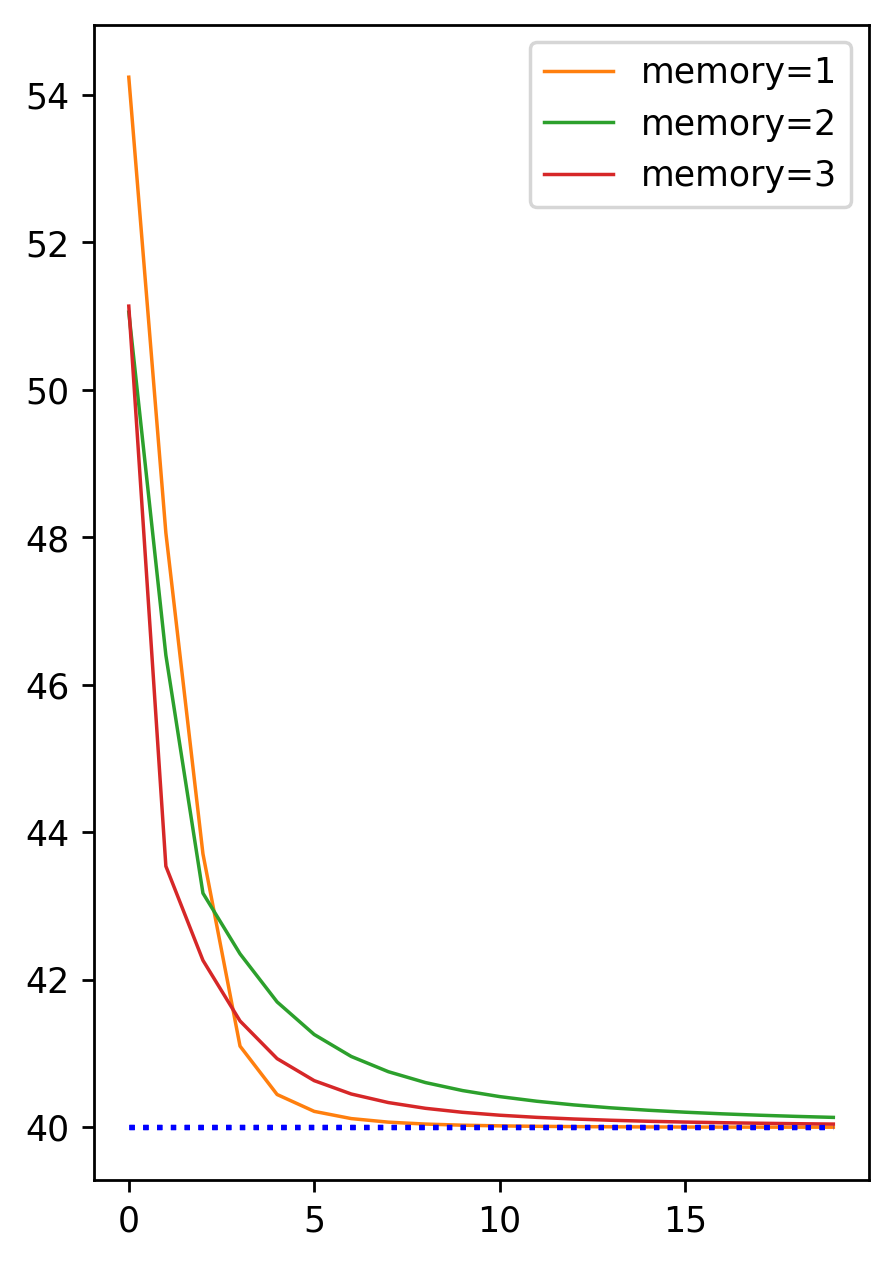

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 6), dpi=250)
for k in k_list:
    mean = np.mean(V1_hist[k], axis=0)
    std = np.std(V1_hist[k], axis=0)
    ax.plot(range(it), mean, label=f'memory={k}', color=list(mcolors.TABLEAU_COLORS)[k], lw=1)
    # ax.fill_between(range(it), mean - std, mean + std, color=list(mcolors.TABLEAU_COLORS)[k], alpha=0.2, ec=None)
    ax.hlines(40, 0, it - 1, color='b', linestyle='dotted')
    # ax.set_xticks(range(it))
ax.legend()